In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Spam_detection/spam.csv')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
data.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df=data.copy()
df['Category']=data['Category'].map({'spam':1,'ham':0})

In [ ]:
df.sample(5)

,Category,Message
3449,0,Its &lt;#&gt; k here oh. Should i send home f...
5131,0,That sucks. I'll go over so u can do my hair. ...
3183,0,"My Parents, My Kidz, My Friends n My Colleague..."
4216,0,No dear i was sleeping :-P
4835,0,I hope your pee burns tonite.


In [ ]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

In [ ]:
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]
X_test_count = v.transform(X_test.astype(str))


In [ ]:
model=MultinomialNB()
model.fit(X_train_count,y_train)


MultinomialNB()

In [ ]:
print(round(model.score(X_test_count, y_test),5))
print(round(model.score(X_train_count, y_train),5))


0.97937
0.99304


In [ ]:

import pickle

with open('/content/drive/MyDrive/Spam_detection/spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('/content/drive/MyDrive/Spam_detection/vectorizer.pkl', 'wb') as f:
    pickle.dump(v, f)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.99      0.87      0.93       174

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



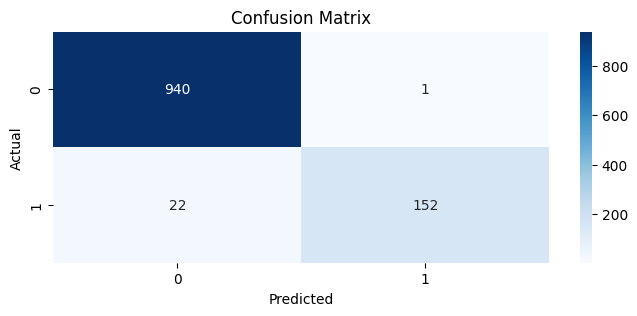

In [ ]:
y_pred = model.predict(X_test_count)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Using svm

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', random_state=0)

In [ ]:
svm.fit(X_train_count,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
print(round(svm.score(X_test_count, y_test),5))
print(round(svm.score(X_train_count, y_train),5))


0.98117
0.99955


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       1.00      0.88      0.94       174

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



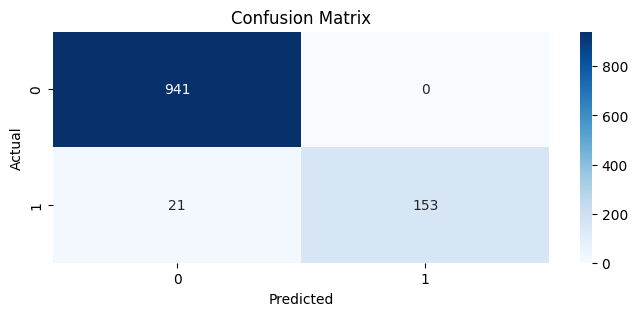

In [ ]:
y_pred = svm.predict(X_test_count)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

import pickle

with open('/content/drive/MyDrive/Spam_detection/spam_model_svm.pkl', 'wb') as f:
    pickle.dump(svm, f)

# with open('/content/drive/MyDrive/Spam_detection/vectorizer.pkl', 'wb') as f:
#     pickle.dump(v, f)

In [ ]:


import pickle
import pandas as pd


with open('/content/drive/MyDrive/Spam_detection/spam_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('/content/drive/MyDrive/Spam_detection/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

def predict_spam(message):
    message_vec = vectorizer.transform([message])
    prediction = model.predict(message_vec)[0]
    return "Spam" if prediction == 1 else "Not Spam"

spam_message = "Congratulations! You've won a free cruise!"
prediction = predict_spam(spam_message)
print(f"Message: {spam_message}")
print(f"Prediction: {prediction}")

ham_message = "Hello, how are you doing today?"
prediction = predict_spam(ham_message)
print(f"Message: {ham_message}")
print(f"Prediction: {prediction}")

Message: Congratulations! You've won a free cruise!
Prediction: Spam
Message: Hello, how are you doing today?
Prediction: Not Spam
